<a href="https://colab.research.google.com/github/Sathwika1103/DeepLearning_CourseProject/blob/main/DL_Course_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [ ]:
!pip install dgl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 28.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylin

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset, Dataset
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import torch
import dgl
from dgl.nn import SAGEConv
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error, accuracy_score
import warnings
warnings.filterwarnings('ignore')

DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


# Reading the dataset , data exploration

In [ ]:
movies_df = pd.read_csv('/content/movies.csv')
ratings_df = pd.read_csv('/content/ratings.csv')

In [ ]:
movies_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [ ]:
ratings_df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [ ]:
merged_df = pd.merge(ratings_df, movies_df, on='movieId')
genres_onehot = merged_df['genres'].str.get_dummies(sep='|')
new_df = pd.concat([merged_df[['userId', 'movieId', 'rating']], genres_onehot], axis=1)

In [ ]:
new_df

,userId,movieId,rating,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,4.0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,5,1,4.0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,7,1,4.5,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,15,1,2.5,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,17,1,4.5,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,610,160341,2.5,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
100832,610,160527,4.5,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
100833,610,160836,3.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
100834,610,163937,3.5,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


#Multi layer perceptron- Content based

In [ ]:
class RatingPredictionModel(nn.Module):
    def __init__(self, input_size):
        super(RatingPredictionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 32)
        self.fc2 = nn.Linear(32, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 16)
        self.fc5 = nn.Linear(16,1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)
        return x

In [ ]:
input_features = new_df.drop(columns=['rating'])

output_ratings = new_df['rating']

X = torch.tensor(input_features.values, dtype=torch.float32)
y = torch.tensor(output_ratings.values, dtype=torch.float32).view(-1, 1)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize input features
scaler = StandardScaler()
X_train_scaled = torch.tensor(scaler.fit_transform(X_train), dtype=torch.float32)
X_test_scaled = torch.tensor(scaler.transform(X_test), dtype=torch.float32)

Epoch [1/500], Loss: 14.570653915405273
Epoch [2/500], Loss: 14.493172645568848
Epoch [3/500], Loss: 14.414848327636719
Epoch [4/500], Loss: 14.33549690246582
Epoch [5/500], Loss: 14.25515079498291
Epoch [6/500], Loss: 14.173657417297363
Epoch [7/500], Loss: 14.09065055847168
Epoch [8/500], Loss: 14.006489753723145
Epoch [9/500], Loss: 13.921038627624512
Epoch [10/500], Loss: 13.833446502685547
Epoch [11/500], Loss: 13.743708610534668
Epoch [12/500], Loss: 13.651294708251953
Epoch [13/500], Loss: 13.555373191833496
Epoch [14/500], Loss: 13.455584526062012
Epoch [15/500], Loss: 13.351319313049316
Epoch [16/500], Loss: 13.242158889770508
Epoch [17/500], Loss: 13.127835273742676
Epoch [18/500], Loss: 13.00830078125
Epoch [19/500], Loss: 12.882966995239258
Epoch [20/500], Loss: 12.750810623168945
Epoch [21/500], Loss: 12.61067008972168
Epoch [22/500], Loss: 12.46191692352295
Epoch [23/500], Loss: 12.303276062011719
Epoch [24/500], Loss: 12.133610725402832
Epoch [25/500], Loss: 11.951859474

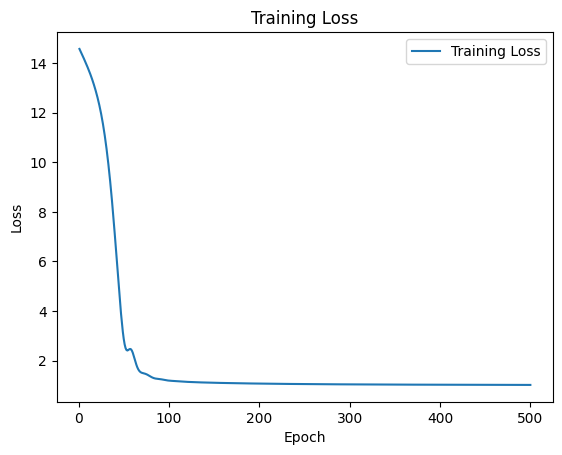

In [ ]:
# Initialize the model
input_size = input_features.shape[1]
model = RatingPredictionModel(input_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses = []

# Train the model
num_epochs = 500
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_scaled)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    # Append the training loss to the list
    train_losses.append(loss.item())
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

# Plot the training loss
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_scaled)
    test_loss = criterion(test_outputs, y_test)
    print(f'Test Loss: {test_loss.item()}')

Test Loss: 1.0167124271392822


 Making predictions for a particular user

In [ ]:
rated_movie_ids = ratings_df[ratings_df['userId'] == 1]['movieId']

# Then, create a new DataFrame with movies that are not rated by user ID 1
unrated_movies_df = movies_df[~movies_df['movieId'].isin(rated_movie_ids)]
unrated_movies_df.reset_index(drop=True, inplace=True)

# Now unrated_movies_df contains movies that are not rated by user ID 1
unrated_movies_df

,movieId,title,genres
0,2,Jumanji (1995),Adventure|Children|Fantasy
1,4,Waiting to Exhale (1995),Comedy|Drama|Romance
2,5,Father of the Bride Part II (1995),Comedy
3,7,Sabrina (1995),Comedy|Romance
4,8,Tom and Huck (1995),Adventure|Children
...,...,...,...
9505,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9506,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9507,193585,Flint (2017),Drama
9508,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [ ]:
genres_encoded = unrated_movies_df['genres'].str.get_dummies(sep='|')
recommendation_df = pd.DataFrame({'userId': [1] * len(unrated_movies_df), 'movieId': unrated_movies_df['movieId']})
recommendation_df = pd.concat([recommendation_df, genres_encoded], axis=1)
recommendation_df

,userId,movieId,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,2,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,4,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,5,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,7,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,8,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9505,1,193581,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9506,1,193583,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9507,1,193585,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9508,1,193587,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_recommend = torch.tensor(recommendation_df.values, dtype=torch.float32)
X_recommend_scaled = torch.tensor(scaler.transform(X_recommend), dtype=torch.float32)

In [ ]:
# Use the trained model to predict ratings
model.eval()
with torch.no_grad():
    predicted_ratings = model(X_recommend_scaled)

# Convert predicted ratings tensor to a DataFrame
predicted_ratings_df = pd.DataFrame(predicted_ratings.numpy(), columns=['predicted_rating'])

In [ ]:
# Concatenate predicted ratings with the unrated movies DataFrame
output_df = pd.concat([unrated_movies_df, predicted_ratings_df], axis=1)

In [ ]:
output_df

,movieId,title,genres,predicted_rating
0,2,Jumanji (1995),Adventure|Children|Fantasy,3.504271
1,4,Waiting to Exhale (1995),Comedy|Drama|Romance,3.733767
2,5,Father of the Bride Part II (1995),Comedy,3.343766
3,7,Sabrina (1995),Comedy|Romance,3.531776
4,8,Tom and Huck (1995),Adventure|Children,2.825715
...,...,...,...,...
9505,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,3.778288
9506,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,4.167322
9507,193585,Flint (2017),Drama,4.396795
9508,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,4.265709


In [ ]:
# Sort the recommendation_df by predicted ratings in descending order
top_recommendations = output_df.sort_values(by='predicted_rating', ascending=False)

# Select the top 10 recommended movies
top_recommendations.head(10)

,movieId,title,genres,predicted_rating
7182,80478,"Man Vanishes, A (Ningen Johatsu) (1967)",Documentary|Drama|Mystery,4.787746
9503,193573,Love Live! The School Idol Movie (2015),Animation,4.657382
9501,193567,anohana: The Flower We Saw That Day - The Movi...,Animation|Drama,4.651640
9497,190219,Bunny (1998),Animation,4.624424
9390,177939,"The Night Is Short, Walk on Girl (2017)",Animation|Romance,4.604383
9401,179133,Loving Vincent (2017),Animation|Crime|Drama,4.595585
9385,177285,Sword Art Online The Movie: Ordinal Scale (2017),Action|Adventure|Animation|Fantasy|Sci-Fi,4.559565
9482,188675,Dogman (2018),Crime|Drama,4.555325
6113,49265,Shooting Dogs (a.k.a. Beyond the Gates) (2005),Documentary|Drama|War,4.523046
4603,7217,Dark Passage (1947),Crime|Drama|Film-Noir|Romance|Thriller,4.522539


 Filtering movies based on the previous rated genres by the user

In [ ]:
# Get the movie IDs rated by user ID 1
rated_movie_ids_user1 = ratings_df.loc[ratings_df['userId'] == 1, 'movieId']

# Filter unrated_movies_df to include only movies not rated by user ID 1
unrated_movies_df = unrated_movies_df[~unrated_movies_df['movieId'].isin(rated_movie_ids_user1)]

# Reset index
unrated_movies_df.reset_index(drop=True, inplace=True)

# Extract genres of movies rated by user ID 1
user1_rated_genres = movies_df[movies_df['movieId'].isin(rated_movie_ids_user1)]['genres']

# Split and create a set of unique genres
user1_genres_set = set('|'.join(user1_rated_genres).split('|'))

In [ ]:
user1_genres_set

{'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [ ]:
filtered_unrated_movies = unrated_movies_df[unrated_movies_df['genres'].apply(lambda x: any(genre in x for genre in user1_genres_set))]
filtered_unrated_movies_df = unrated_movies_df[unrated_movies_df['genres'].apply(lambda x: any(genre in x for genre in user1_genres_set))]['movieId']

filtered_recommendation_df = recommendation_df[recommendation_df['movieId'].isin(filtered_unrated_movies_df)]
filtered_recommendation_df.reset_index(drop=True, inplace=True)

In [ ]:
filtered_recommendation_df #Data to be given to the model for predictions

,userId,movieId,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,2,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,4,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,5,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,7,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,8,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9126,1,193581,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9127,1,193583,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9128,1,193585,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9129,1,193587,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_recommend_f = torch.tensor(filtered_recommendation_df.values, dtype=torch.float32)
X_recommend_scaled_f = torch.tensor(scaler.transform(X_recommend_f), dtype=torch.float32)

# Use the trained model to predict ratings
model.eval()
with torch.no_grad():
    filtered_predicted_ratings = model(X_recommend_scaled_f)

# Convert predicted ratings tensor to a DataFrame
filtered_predicted_ratings_df = pd.DataFrame(filtered_predicted_ratings.numpy(), columns=['predicted_rating'])

In [ ]:
filtered_unrated_movies.reset_index(drop=True, inplace=True)
filtered_output_df = pd.concat([filtered_unrated_movies, filtered_predicted_ratings_df], axis=1)

# Sort the filtered_output_df by predicted ratings in descending order
top_recommendations_f = filtered_output_df.sort_values(by='predicted_rating', ascending=False)

# Select the top 10 recommended movies
top_recommendations_f.head(10)

,movieId,title,genres,predicted_rating
6960,80478,"Man Vanishes, A (Ningen Johatsu) (1967)",Documentary|Drama|Mystery,4.787746
9125,193573,Love Live! The School Idol Movie (2015),Animation,4.657382
9123,193567,anohana: The Flower We Saw That Day - The Movi...,Animation|Drama,4.651640
9120,190219,Bunny (1998),Animation,4.624424
9025,177939,"The Night Is Short, Walk on Girl (2017)",Animation|Romance,4.604383
9034,179133,Loving Vincent (2017),Animation|Crime|Drama,4.595585
9020,177285,Sword Art Online The Movie: Ordinal Scale (2017),Action|Adventure|Animation|Fantasy|Sci-Fi,4.559565
9106,188675,Dogman (2018),Crime|Drama,4.555325
5940,49265,Shooting Dogs (a.k.a. Beyond the Gates) (2005),Documentary|Drama|War,4.523046
4490,7217,Dark Passage (1947),Crime|Drama|Film-Noir|Romance|Thriller,4.522539


# Autoencoder

In [ ]:
# Define the architecture of the autoencoder
class Autoencoder(nn.Module):
    def __init__(self, input_size):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, 16),
            nn.LeakyReLU(0.2),  # Leaky ReLU with negative slope of 0.2
            nn.Linear(16, 8),
            nn.LeakyReLU(0.2)
        )
        self.decoder = nn.Sequential(
            nn.Linear(8, 16),
            nn.LeakyReLU(0.2),
            nn.Linear(16, input_size),
            nn.LeakyReLU(0.2)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [ ]:
# Extract input features (excluding ratings)
input_features = new_df.drop(columns=['rating', 'userId', 'movieId'])

# Standardize input features
autoencoder_scaler = StandardScaler()
input_features_scaled = autoencoder_scaler.fit_transform(input_features)

# Convert DataFrame to PyTorch tensor
X = torch.tensor(input_features_scaled, dtype=torch.float32)

# Split the data into train and test sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Create DataLoader for train and test sets
batch_size = 64
train_dataset = TensorDataset(X_train, X_train)  # Input and target are the same for reconstruction
test_dataset = TensorDataset(X_test, X_test)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Epoch [1/30], Train Loss: 0.4130377640223866
Epoch [2/30], Train Loss: 0.1514490627030568
Epoch [3/30], Train Loss: 0.1126161918244329
Epoch [4/30], Train Loss: 0.09334985902573112
Epoch [5/30], Train Loss: 0.08328053961400976
Epoch [6/30], Train Loss: 0.07700041941579844
Epoch [7/30], Train Loss: 0.07261845602511638
Epoch [8/30], Train Loss: 0.06931841894267524
Epoch [9/30], Train Loss: 0.06624720398050885
Epoch [10/30], Train Loss: 0.0635087702475241
Epoch [11/30], Train Loss: 0.060345299896986074
Epoch [12/30], Train Loss: 0.058532271883883394
Epoch [13/30], Train Loss: 0.05699614298860067
Epoch [14/30], Train Loss: 0.055853264075209096
Epoch [15/30], Train Loss: 0.054864302380639926
Epoch [16/30], Train Loss: 0.05382726535148612
Epoch [17/30], Train Loss: 0.0531044575361874
Epoch [18/30], Train Loss: 0.05205554684809075
Epoch [19/30], Train Loss: 0.05126504434592493
Epoch [20/30], Train Loss: 0.05033018523059213
Epoch [21/30], Train Loss: 0.04943324852478594
Epoch [22/30], Train Lo

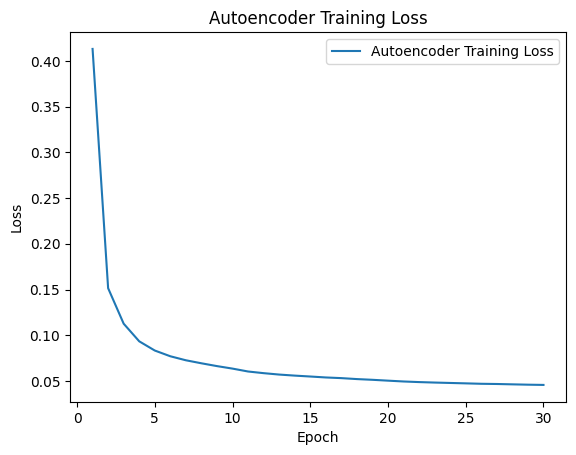

In [ ]:
input_size = input_features.shape[1]
autoencoder = Autoencoder(input_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# Train the autoencoder
num_epochs = 30
autoencoder_train_losses = []  # Initialize list to store training loss for autoencoder
for epoch in range(num_epochs):
    running_train_loss = 0.0
    for inputs, _ in train_dataloader:
        optimizer.zero_grad()
        outputs = autoencoder(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
        running_train_loss += loss.item() * inputs.size(0)
    train_loss = running_train_loss / len(train_dataloader.dataset)
    autoencoder_train_losses.append(train_loss)  # Append the training loss to the list
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss}")

# Plot the training loss for the autoencoder
plt.plot(range(1, num_epochs+1), autoencoder_train_losses, label='Autoencoder Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Autoencoder Training Loss')
plt.legend()
plt.show()

In [ ]:
# Compute test loss
test_loss = 0.0
with torch.no_grad():
    for inputs, _ in test_dataloader:
        outputs = autoencoder(inputs)
        loss = criterion(outputs, inputs)
        test_loss += loss.item() * inputs.size(0)
test_loss /= len(test_dataloader.dataset)

print(f"Test Loss for the Autoencoder : {test_loss}")

Test Loss for the Autoencoder : 0.04574115941790847


In [ ]:
encoder_output = autoencoder.encoder(X)

# Extract userId and movieId columns from new_df
user_movie_df = new_df[['userId', 'movieId']]

# Concatenate userId, movieId, and encoder output
encoded_data_df = pd.concat([user_movie_df, pd.DataFrame(encoder_output.detach().numpy())], axis=1)

In [ ]:
encoded_data_df #New input to be given to the prediciton model

,userId,movieId,0,1,2,3,4,5,6,7
0,1,1,0.931400,5.925548,13.866652,11.511726,15.379682,-0.676628,9.514444,6.813866
1,5,1,0.931400,5.925548,13.866652,11.511726,15.379682,-0.676628,9.514444,6.813866
2,7,1,0.931400,5.925548,13.866652,11.511726,15.379682,-0.676628,9.514444,6.813866
3,15,1,0.931400,5.925548,13.866652,11.511726,15.379682,-0.676628,9.514444,6.813866
4,17,1,0.931400,5.925548,13.866652,11.511726,15.379682,-0.676628,9.514444,6.813866
...,...,...,...,...,...,...,...,...,...,...
100831,610,160341,-0.018292,4.095236,11.347965,4.114430,3.280998,0.737866,4.767743,6.844641
100832,610,160527,1.586030,2.076385,11.591234,7.276453,4.513718,0.665188,6.650045,8.907003
100833,610,160836,0.287227,1.918484,9.295428,4.131684,2.532058,0.981598,5.589522,6.934092
100834,610,163937,0.700846,7.619596,12.366781,4.317958,4.476761,1.285554,8.129955,8.904753


In [ ]:
input_features = encoded_data_df

output_ratings = new_df['rating']

X = torch.tensor(input_features.values, dtype=torch.float32)
y = torch.tensor(output_ratings.values, dtype=torch.float32).view(-1, 1)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize input features
mlp_scaler = StandardScaler()
X_train_scaled = torch.tensor(mlp_scaler.fit_transform(X_train), dtype=torch.float32)
X_test_scaled = torch.tensor(mlp_scaler.transform(X_test), dtype=torch.float32)

Epoch [1/300], Loss: 14.032197952270508
Epoch [2/300], Loss: 13.958202362060547
Epoch [3/300], Loss: 13.882853507995605
Epoch [4/300], Loss: 13.806146621704102
Epoch [5/300], Loss: 13.727363586425781
Epoch [6/300], Loss: 13.64571762084961
Epoch [7/300], Loss: 13.560733795166016
Epoch [8/300], Loss: 13.471370697021484
Epoch [9/300], Loss: 13.376046180725098
Epoch [10/300], Loss: 13.274495124816895
Epoch [11/300], Loss: 13.167201042175293
Epoch [12/300], Loss: 13.055195808410645
Epoch [13/300], Loss: 12.938371658325195
Epoch [14/300], Loss: 12.816447257995605
Epoch [15/300], Loss: 12.68738079071045
Epoch [16/300], Loss: 12.549970626831055
Epoch [17/300], Loss: 12.403167724609375
Epoch [18/300], Loss: 12.245868682861328
Epoch [19/300], Loss: 12.077141761779785
Epoch [20/300], Loss: 11.895915985107422
Epoch [21/300], Loss: 11.700705528259277
Epoch [22/300], Loss: 11.489940643310547
Epoch [23/300], Loss: 11.26186466217041
Epoch [24/300], Loss: 11.014887809753418
Epoch [25/300], Loss: 10.746

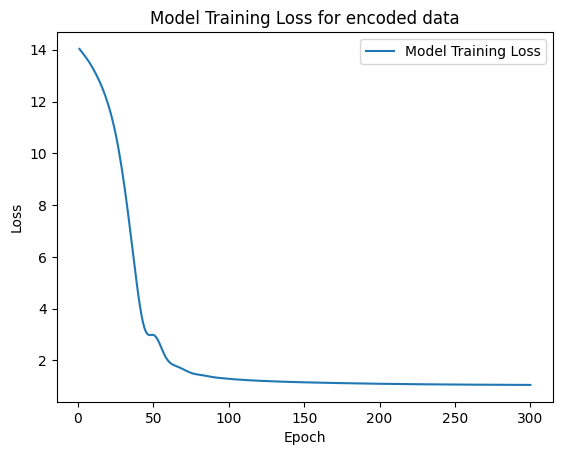

In [ ]:
# Initialize the model
input_size = input_features.shape[1]
mlp_model = RatingPredictionModel(input_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(mlp_model.parameters(), lr=0.001)

# Train the model
num_epochs = 300
model_train_losses = []  # Initialize list to store training loss for the model

for epoch in range(num_epochs):
    mlp_model.train()
    optimizer.zero_grad()
    outputs = mlp_model(X_train_scaled)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    model_train_losses.append(loss.item())  # Append the training loss to the list
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

# Plot the training loss for the model
plt.plot(range(1, num_epochs+1), model_train_losses, label='Model Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Training Loss for encoded data')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model
mlp_model.eval()
with torch.no_grad():
    test_outputs = mlp_model(X_test_scaled)
    test_loss = criterion(test_outputs, y_test)
    print(f'Test Loss for the encoded data: {test_loss.item()}')

Test Loss for the encoded data: 1.0426963567733765


Function for movies recommendation for a specific user id

In [ ]:
def recommend_movies(user_id, model, autoencoder, ratings_df, movies_df, model_scaler,autoencoder_scalar, top_n=10):
    # Filter unrated movies for the specified user ID
    rated_movie_ids_user = ratings_df.loc[ratings_df['userId'] == user_id, 'movieId']

    # Filter movies_df to include only movies not rated by user ID
    unrated_movies_df = movies_df[~movies_df['movieId'].isin(rated_movie_ids_user)]

    # Reset index
    unrated_movies_df.reset_index(drop=True, inplace=True)

    # Extract genres of movies rated by user ID
    user_rated_genres = movies_df[movies_df['movieId'].isin(rated_movie_ids_user)]['genres']

    # Split and create a set of unique genres
    user_genres_set = set('|'.join(user_rated_genres).split('|'))

    #Creating input dataframe for the model
    genres_encoded = unrated_movies_df['genres'].str.get_dummies(sep='|')
    recommendation_df = pd.DataFrame({'userId': [user_id] * len(unrated_movies_df), 'movieId': unrated_movies_df['movieId']})
    recommendation_df = pd.concat([recommendation_df, genres_encoded], axis=1)

    #Filtering the inputs on genres only rated by the user
    filtered_unrated_movies = unrated_movies_df[unrated_movies_df['genres'].apply(lambda x: any(genre in x for genre in user_genres_set))]
    filtered_unrated_movies.reset_index(drop=True, inplace=True)

    filtered_unrated_movies_df = unrated_movies_df[unrated_movies_df['genres'].apply(lambda x: any(genre in x for genre in user_genres_set))]['movieId']

    filtered_recommendation_df = recommendation_df[recommendation_df['movieId'].isin(filtered_unrated_movies_df)]
    filtered_recommendation_df.reset_index(drop=True, inplace=True)

    #Reducing the input features using autoencoder
    input_features_autoencoder = filtered_recommendation_df.drop(columns=['userId', 'movieId'])
    input_features_scaled_autoencoder = autoencoder_scaler.fit_transform(input_features_autoencoder)

    # Convert DataFrame to PyTorch tensor
    X = torch.tensor(input_features_scaled_autoencoder, dtype=torch.float32)

    #Encode the input
    encoder_output = autoencoder.encoder(X)

    # Extract userId and movieId columns from new_df
    user_movie_df = filtered_recommendation_df[['userId', 'movieId']]

    # Creating encoded inputs for the model
    encoded_data_df = pd.concat([user_movie_df, pd.DataFrame(encoder_output.detach().numpy())], axis=1)

    X_recommend = torch.tensor(encoded_data_df.values, dtype=torch.float32)
    X_recommend_scaled = torch.tensor(model_scaler.transform(X_recommend), dtype=torch.float32)

    # Use the trained model to predict ratings
    model.eval()
    with torch.no_grad():
        predicted_ratings = model(X_recommend_scaled)

    # Convert predicted ratings tensor to a DataFrame
    predicted_ratings_df = pd.DataFrame(predicted_ratings.numpy(), columns=['predicted_rating'])

    # Scale the ratings between 0 and 5
    scaler = MinMaxScaler(feature_range=(0, 5))
    predicted_ratings_scaled = scaler.fit_transform(predicted_ratings_df)

    # Update the DataFrame with the scaled predicted ratings
    predicted_ratings_df['predicted_rating'] = predicted_ratings_scaled

    recommendations = pd.concat([filtered_unrated_movies, predicted_ratings_df], axis=1)

    # Sort the recommendations by predicted ratings
    recommendations = recommendations.sort_values(by='predicted_rating', ascending=False)

    # Get top N recommended movie IDs
    top_recommendations = recommendations.head(top_n)

    return top_recommendations

In [ ]:
top_recommendations_content_based = recommend_movies(1, model, autoencoder, ratings_df, movies_df, mlp_scaler,autoencoder_scaler, top_n=10)

In [ ]:
top_recommendations_content_based

,movieId,title,genres,predicted_rating
6199,55995,Beowulf (2007),Action|Adventure|Animation|Fantasy|IMAX,5.000000
5015,8965,"Polar Express, The (2004)",Adventure|Animation|Children|Fantasy|IMAX,4.760205
7833,107953,Dragon Ball Z: Battle of Gods (2013),Action|Animation|Fantasy|IMAX,4.745220
7046,83349,"Green Hornet, The (2011)",Action|Comedy|Crime|Fantasy|Thriller|IMAX,4.626954
7359,93272,Dr. Seuss' The Lorax (2012),Animation|Fantasy|Musical|IMAX,4.490664
9034,179133,Loving Vincent (2017),Animation|Crime|Drama,4.326405
6690,71264,Cloudy with a Chance of Meatballs (2009),Animation|Children|Fantasy|IMAX,4.216911
6853,76093,How to Train Your Dragon (2010),Adventure|Animation|Children|Fantasy|IMAX,4.202291
8788,161354,Batman: The Killing Joke (2016),Action|Animation|Crime|Drama,4.119638
9129,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,4.074256


#Reccurent neural network

In [ ]:
def load_movielens_data():
    data = pd.read_csv('ratings.csv')
    user_ids = data['userId'].values - 1
    item_ids = data['movieId'].values - 1
    ratings = data['rating'].values.astype(np.float32)
    return user_ids, item_ids, ratings

In [ ]:
class MovielensDataset(Dataset):
    def __init__(self, user_ids, item_ids, ratings):
        self.user_ids = user_ids
        self.item_ids = item_ids
        self.ratings = ratings

    def __len__(self):
        return len(self.user_ids)

    def __getitem__(self, idx):
        return self.user_ids[idx], self.item_ids[idx], self.ratings[idx]

In [ ]:
# Define the RNN model
class RNNRecommendation(nn.Module):
    def __init__(self, num_users, num_items, embedding_size=50, hidden_size=100, num_layers=1):
        super(RNNRecommendation, self).__init__()

        self.user_embedding = nn.Embedding(num_users, embedding_size)
        self.item_embedding = nn.Embedding(num_items, embedding_size)
        self.rnn = nn.RNN(embedding_size * 2, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, user_ids, item_ids):
        user_embedded = self.user_embedding(user_ids)
        item_embedded = self.item_embedding(item_ids)
        rnn_input = torch.cat((user_embedded, item_embedded), dim=1).unsqueeze(1)
        rnn_output, _ = self.rnn(rnn_input)
        rnn_output = rnn_output.squeeze()
        logits = self.fc(rnn_output)
        return logits.squeeze()

In [ ]:
# Load and preprocess data
user_ids, item_ids, ratings = load_movielens_data()

In [ ]:
# Split data into train, validate, and test sets
train_user_ids, test_user_ids, train_item_ids, test_item_ids, train_ratings, test_ratings = train_test_split(
    user_ids, item_ids, ratings, test_size=0.2, random_state=42)
train_user_ids, val_user_ids, train_item_ids, val_item_ids, train_ratings, val_ratings = train_test_split(
    train_user_ids, train_item_ids, train_ratings, test_size=0.2, random_state=42)

train_dataset = MovielensDataset(train_user_ids, train_item_ids, train_ratings)
val_dataset = MovielensDataset(val_user_ids, val_item_ids, val_ratings)
test_dataset = MovielensDataset(test_user_ids, test_item_ids, test_ratings)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [ ]:
# Define hyperparameters
num_users = max(user_ids) + 1
num_items = max(item_ids) + 1
embedding_size = 50
hidden_size = 100
num_layers = 1
learning_rate = 0.001
num_epochs = 10

# Initialize model, loss function, and optimizer
model = RNNRecommendation(num_users, num_items, embedding_size, hidden_size, num_layers)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# Training loop
train_losses = []
val_losses = []
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for batch_user_ids, batch_item_ids, batch_ratings in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_user_ids, batch_item_ids)
        loss = criterion(outputs, batch_ratings)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * len(batch_ratings)
    train_loss /= len(train_dataset)
    train_losses.append(train_loss)

    # Evaluate on validation set
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch_user_ids, batch_item_ids, batch_ratings in val_loader:
            outputs = model(batch_user_ids, batch_item_ids)
            val_loss += criterion(outputs, batch_ratings).item() * len(batch_ratings)
    val_loss /= len(val_dataset)
    val_losses.append(val_loss)

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

Epoch 1/10, Train Loss: 1.9948, Val Loss: 1.1410
Epoch 2/10, Train Loss: 1.0721, Val Loss: 1.0371
Epoch 3/10, Train Loss: 0.9685, Val Loss: 0.9753
Epoch 4/10, Train Loss: 0.9084, Val Loss: 0.9503
Epoch 5/10, Train Loss: 0.8726, Val Loss: 0.9350
Epoch 6/10, Train Loss: 0.8467, Val Loss: 0.9289
Epoch 7/10, Train Loss: 0.8250, Val Loss: 0.9277
Epoch 8/10, Train Loss: 0.8045, Val Loss: 0.9228
Epoch 9/10, Train Loss: 0.7790, Val Loss: 0.9354
Epoch 10/10, Train Loss: 0.7530, Val Loss: 0.9374


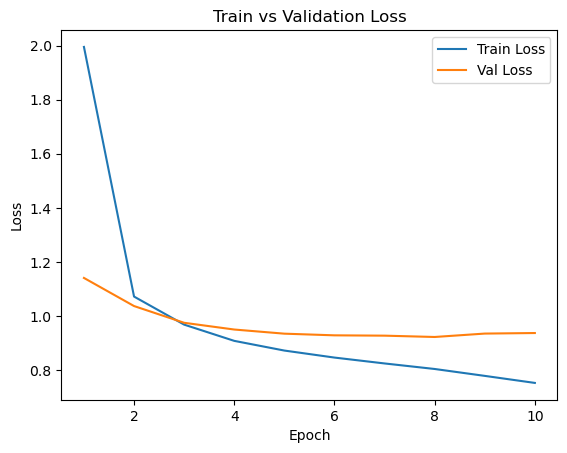

In [ ]:
# Plot train vs validation loss
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate on test set
model.eval()
test_loss = 0.0
with torch.no_grad():
    predictions = []
    for batch_user_ids, batch_item_ids, batch_ratings in test_loader:
        outputs = model(batch_user_ids, batch_item_ids)
        test_loss += criterion(outputs, batch_ratings).item() * len(batch_ratings)
        predictions.append(outputs)
test_loss /= len(test_loader.dataset)
print(f'Test Loss: {test_loss:.4f}')

Test Loss: 0.9559


In [ ]:
# Combine predictions from batches
predictions = torch.cat(predictions, dim=0)

# Convert predictions to numpy array
predictions_np = predictions.cpu().numpy()

# Get user-item pairs with highest predicted ratings
top_n = 10
recommendations = {}
for user_id in range(num_users):
    user_predictions = predictions_np[test_user_ids == user_id]
    top_indices = np.argsort(user_predictions)[::-1][:top_n]
    top_items = test_item_ids[test_user_ids == user_id][top_indices]
    recommendations[user_id] = top_items.tolist()

# Print recommendations for a few users
user_ids_to_show = [0, 1, 2]
for user_id in user_ids_to_show:
    recommended_movies = recommendations[user_id]
    print(f"User {user_id}'s Recommendations:")
    for movie_id in recommended_movies:
        print(f"- Movie ID: {movie_id}")

User 0's Recommendations:
- Movie ID: 63
- Movie ID: 196
- Movie ID: 135
- Movie ID: 99
- Movie ID: 118
- Movie ID: 180
- Movie ID: 31
- Movie ID: 191
- Movie ID: 0
- Movie ID: 152
User 1's Recommendations:
- Movie ID: 301
- Movie ID: 305
- Movie ID: 241
- Movie ID: 18
- Movie ID: 9
- Movie ID: 294
- Movie ID: 297
- Movie ID: 292
- Movie ID: 304
- Movie ID: 286
User 2's Recommendations:
- Movie ID: 180
- Movie ID: 330
- Movie ID: 333
- Movie ID: 244
- Movie ID: 293
- Movie ID: 354
- Movie ID: 321
- Movie ID: 335
- Movie ID: 341


# LSTM

In [ ]:
# Load MovieLens dataset
ratings_data = pd.read_csv('ratings.csv')

# Load movies data
movies_data = pd.read_csv('movies.csv')

In [ ]:
# Merge ratings and movies data to get movie titles
ratings_with_titles = pd.merge(ratings_data, movies_data[['movieId', 'title']], on='movieId')

# Calculate average rating for each movie
average_ratings = ratings_with_titles.groupby('title')['rating'].mean().sort_values(ascending=False)

In [ ]:
# Initialize device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Reshape input tensor to be 3-D with batch size as the first dimension
        x = x.unsqueeze(0) if len(x.size()) == 2 else x

        # Initialize hidden state with zeros
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(x.device)

        # Forward propagate LSTM
        out, _ = self.lstm(x, (h0, c0))  # shape: (batch_size, seq_length, hidden_size)

        # Decode the hidden state of the last time step
        out = self.fc(out[:, -1, :])  # shape: (batch_size, output_size)
        return out


In [ ]:
class MovieLensDataset(Dataset):
    def __init__(self, ratings_data, user_col, item_col, rating_col):
        self.ratings_data = ratings_data
        self.user_col = user_col
        self.item_col = item_col
        self.rating_col = rating_col

    def __len__(self):
        return len(self.ratings_data)

    def __getitem__(self, idx):
        user = self.ratings_data.iloc[idx][self.user_col]
        item = self.ratings_data.iloc[idx][self.item_col]
        rating = self.ratings_data.iloc[idx][self.rating_col]

        return user, item, rating

In [ ]:
# Split dataset into train, validation, and test sets
train_data, test_data = train_test_split(ratings_data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

In [ ]:
# Hyperparameters
input_size = 2 # User and item IDs
hidden_size = 256  # Increased hidden size
num_layers = 3  # Increased number of layers
output_size = 1
num_epochs = 10
batch_size=64
learning_rate = 0.001

In [ ]:
# Initialize dataset and dataloaders
train_dataset = MovieLensDataset(train_data, 'userId', 'movieId', 'rating')
val_dataset = MovieLensDataset(val_data, 'userId', 'movieId', 'rating')
test_dataset = MovieLensDataset(test_data, 'userId', 'movieId', 'rating')

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [ ]:
# Initialize model, loss function, and optimizer
model = LSTMModel(input_size, hidden_size, num_layers, output_size).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64, 1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([53, 1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([46, 1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(

Epoch [1/10], Train Loss: 1.1507, Val Loss: 1.0267
Epoch [2/10], Train Loss: 1.0523, Val Loss: 1.0232
Epoch [3/10], Train Loss: 1.0502, Val Loss: 1.0273
Epoch [4/10], Train Loss: 1.0524, Val Loss: 1.0240
Epoch [5/10], Train Loss: 1.0511, Val Loss: 1.0296
Epoch [6/10], Train Loss: 1.0500, Val Loss: 1.0232
Epoch [7/10], Train Loss: 1.0503, Val Loss: 1.0238
Epoch [8/10], Train Loss: 1.0489, Val Loss: 1.0271
Epoch [9/10], Train Loss: 1.0507, Val Loss: 1.0469
Epoch [10/10], Train Loss: 1.0498, Val Loss: 1.0233


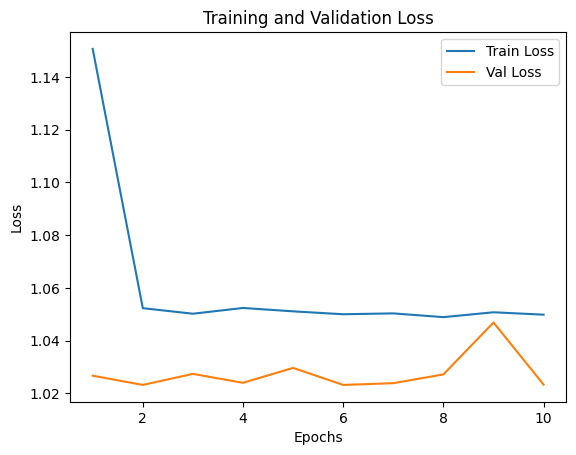

In [ ]:
# Training the model
train_losses = []
val_losses = []
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for user, item, rating in train_loader:
        user = user.unsqueeze(1).to(device)
        item = item.unsqueeze(1).to(device)
        rating = rating.unsqueeze(1).to(device)

        # Forward pass
        outputs = model(torch.cat((user, item), dim=1).float())
        loss = criterion(outputs, rating.float())

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_losses.append(running_loss/len(train_loader))

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for user, item, rating in val_loader:
            user = user.unsqueeze(1).to(device)
            item = item.unsqueeze(1).to(device)
            rating = rating.unsqueeze(1).to(device)

            outputs = model(torch.cat((user, item), dim=1).float())
            val_loss += criterion(outputs, rating).item()

    val_losses.append(val_loss/len(val_loader))
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}')

# Plot training and validation loss curves
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Evaluation
predictions = []
targets = []
model.eval()
with torch.no_grad():
    for user, item, rating in test_loader:
        user = user.unsqueeze(1).to(device)
        item = item.unsqueeze(1).to(device)
        rating = rating.unsqueeze(1).to(device)

        outputs = model(torch.cat((user, item), dim=1).float())
        predictions.extend(outputs.cpu().numpy())
        targets.extend(rating.cpu().numpy())

# Convert lists to arrays
predictions = np.array(predictions).flatten()
targets = np.array(targets).flatten()



In [ ]:
# Evaluation
predictions = []
targets = []
model.eval()
with torch.no_grad():
    for user, item, rating in test_loader:
        user = user.unsqueeze(1).to(device)
        item = item.unsqueeze(1).to(device)
        rating = rating.unsqueeze(1).to(device)

        outputs = model(torch.cat((user, item), dim=1).float())
        predictions.extend(outputs.cpu().numpy())
        targets.extend(rating.cpu().numpy())

# Convert lists to arrays
predictions = np.array(predictions).flatten()
targets = np.array(targets).flatten()

In [ ]:
# Ensure the target and prediction arrays have the same number of samples
min_samples = min(len(targets), len(predictions))
targets = targets[:min_samples]
predictions = predictions[:min_samples]

# Calculate evaluation metrics
mse = mean_squared_error(targets, predictions)
accuracy = accuracy_score(targets.round(), predictions.round())

print(f'Mean Squared Error: {mse}')
print(f'Accuracy: {accuracy}')


Mean Squared Error: 1.0238110300712913
Accuracy: 0.45925925925925926


In [ ]:
lstm_model = LSTMModel(input_size, hidden_size, num_layers, output_size).to(device)

In [ ]:
def generate_recommendations(user_id, model, movies_data, top_n=10):
    # Get movies not rated by the user
    rated_movies = ratings_data[ratings_data['userId'] == user_id]['movieId']
    unrated_movies = movies_data[~movies_data['movieId'].isin(rated_movies)]

    # Generate predictions for unrated movies
    user_ids = torch.tensor([user_id] * len(unrated_movies)).unsqueeze(1).to(device)
    unrated_movie_ids = torch.tensor(unrated_movies['movieId'].values, dtype=torch.long).unsqueeze(1).to(device)
    predictions = model(torch.cat((user_ids, unrated_movie_ids), dim=1).float())
    predictions = predictions.cpu().detach().numpy().flatten()

    # Get top-rated movies
    top_indices = np.argsort(-predictions)[:top_n]
    top_movies = unrated_movies.iloc[top_indices]['title']
    return top_movies

# Example: Generate top recommendations for user with ID 1
user_id = 8
top_recommendations = generate_recommendations(user_id, lstm_model, movies_data)
print(f'Top Recommendations for User {user_id}:')
print(top_recommendations)


Top Recommendations for User 8:
0    Toy Story (1995)
Name: title, dtype: object


# Graph neural networks

In [ ]:
def load_movielens_data():
    data = pd.read_csv('ratings.csv')
    user_ids = data['userId'].values - 1
    item_ids = data['movieId'].values - 1
    ratings = data['rating'].values.astype(np.float32)
    return user_ids, item_ids, ratings

In [ ]:
class MovielensGraphDataset(Dataset):
    def __init__(self, user_ids, item_ids, ratings):
        self.user_ids = user_ids
        self.item_ids = item_ids
        self.ratings = ratings
        self.num_users = max(user_ids) + 1
        self.num_items = max(item_ids) + 1

        # Create user-item interaction graph
        self.graph = self.create_interaction_graph()

    def __len__(self):
        return len(self.user_ids)

    def __getitem__(self, idx):
        user_id = self.user_ids[idx]
        item_id = self.item_ids[idx]
        rating = self.ratings[idx]
        graph_data = (user_id, item_id)
        return graph_data, rating

    def create_interaction_graph(self):
        graph = {}
        for user_id, item_id, rating in zip(self.user_ids, self.item_ids, self.ratings):
            if user_id not in graph:
                graph[user_id] = {}
            graph[user_id][item_id] = rating
        return graph

In [ ]:
class GNNRecommendation(nn.Module):
    def __init__(self, num_users, num_items, embedding_size=50, hidden_size=100):
        super(GNNRecommendation, self).__init__()

        self.user_embedding = nn.Embedding(num_users, embedding_size)
        self.item_embedding = nn.Embedding(num_items, embedding_size)
        self.gnn = nn.GRUCell(embedding_size, hidden_size)
        self.fc = nn.Linear(hidden_size + embedding_size, 1)  # Adjusted linear layer size

    def forward(self, user_ids, item_ids):
        user_embedded = self.user_embedding(user_ids)
        item_embedded = self.item_embedding(item_ids)

        user_hidden = torch.zeros(user_ids.size(0), self.gnn.hidden_size).to(user_ids.device)
        for _ in range(10):  # Iterate over graph for a fixed number of steps
            user_hidden = self.gnn(user_embedded, user_hidden)

        combined_embedded = torch.cat((user_hidden, item_embedded), dim=1)
        logits = self.fc(combined_embedded)
        return logits.squeeze()

In [ ]:
# Load and preprocess data
user_ids, item_ids, ratings = load_movielens_data()
train_user_ids, test_user_ids, train_item_ids, test_item_ids, train_ratings, test_ratings = train_test_split(
    user_ids, item_ids, ratings, test_size=0.2, random_state=42)
train_user_ids, val_user_ids, train_item_ids, val_item_ids, train_ratings, val_ratings = train_test_split(
    train_user_ids, train_item_ids, train_ratings, test_size=0.2, random_state=42)

train_dataset = MovielensGraphDataset(train_user_ids, train_item_ids, train_ratings)
val_dataset = MovielensGraphDataset(val_user_ids, val_item_ids, val_ratings)
test_dataset = MovielensGraphDataset(test_user_ids, test_item_ids, test_ratings)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [ ]:
# Define hyperparameters
num_users = max(user_ids) + 1
num_items = max(item_ids) + 1
embedding_size = 50
hidden_size = 100
learning_rate = 0.001
num_epochs = 10

# Initialize model, loss function, and optimizer
model = GNNRecommendation(num_users, num_items, embedding_size, hidden_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# Training loop with validation
train_losses = []
val_losses = []
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for graph_data, ratings in train_loader:
        user_ids, item_ids = graph_data
        optimizer.zero_grad()
        outputs = model(user_ids, item_ids)
        loss = criterion(outputs, ratings)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * len(ratings)
    train_loss /= len(train_dataset)
    train_losses.append(train_loss)

    # Validate
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for graph_data, ratings in val_loader:
            user_ids, item_ids = graph_data
            outputs = model(user_ids, item_ids)
            val_loss += criterion(outputs, ratings).item() * len(ratings)
    val_loss /= len(val_dataset)
    val_losses.append(val_loss)

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

Epoch 1/10, Train Loss: 1.2631, Val Loss: 0.8929
Epoch 2/10, Train Loss: 0.8747, Val Loss: 0.8424
Epoch 3/10, Train Loss: 0.8071, Val Loss: 0.8072
Epoch 4/10, Train Loss: 0.7536, Val Loss: 0.7953
Epoch 5/10, Train Loss: 0.7194, Val Loss: 0.7795
Epoch 6/10, Train Loss: 0.6960, Val Loss: 0.7733
Epoch 7/10, Train Loss: 0.6804, Val Loss: 0.7709
Epoch 8/10, Train Loss: 0.6677, Val Loss: 0.7714
Epoch 9/10, Train Loss: 0.6575, Val Loss: 0.7773
Epoch 10/10, Train Loss: 0.6503, Val Loss: 0.7754


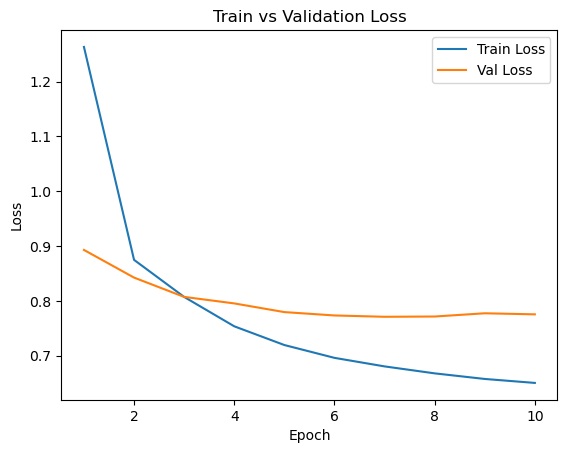

In [ ]:
# Plot train vs validation loss
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss')
plt.legend()
plt.show()

In [ ]:
# Combine predictions from batches
predictions = []
model.eval()
with torch.no_grad():
    for graph_data, ratings in test_loader:
        user_ids, item_ids = graph_data
        outputs = model(user_ids, item_ids)
        predictions.append(outputs)

# Convert predictions to numpy array
predictions = torch.cat(predictions, dim=0)
predictions_np = predictions.cpu().numpy()

# Get user-item pairs with highest predicted ratings
top_n = 10
recommendations = {}
for user_id in range(num_users):
    user_predictions = predictions_np[test_user_ids == user_id]
    top_indices = np.argsort(user_predictions)[::-1][:top_n]
    top_items = test_item_ids[test_user_ids == user_id][top_indices]
    recommendations[user_id] = top_items.tolist()

# Print recommendations for a few users
user_ids_to_show = [0, 1, 2]
for user_id in user_ids_to_show:
    recommended_movies = recommendations[user_id]
    print(f"User {user_id}'s Recommendations:")
    for movie_id in recommended_movies:
        print(f"- Movie ID: {movie_id}")

User 0's Recommendations:
- Movie ID: 1197
- Movie ID: 2328
- Movie ID: 1616
- Movie ID: 1926
- Movie ID: 1277
- Movie ID: 1213
- Movie ID: 3577
- Movie ID: 2990
- Movie ID: 1953
- Movie ID: 3739
User 1's Recommendations:
- Movie ID: 112551
- Movie ID: 48515
- Movie ID: 99113
- Movie ID: 89773
User 2's Recommendations:
- Movie ID: 913
- Movie ID: 719
- Movie ID: 1262
- Movie ID: 2079
- Movie ID: 2089
- Movie ID: 7898
- Movie ID: 848
- Movie ID: 1370


#GraphSage

In [ ]:
ratings_data = pd.read_csv('u.data',delimiter="\t", header=None, names=['userId', 'movieId', 'rating','timestamp'], engine='python')

# Create a graph with users and movies as nodes
user_ids = ratings_data['userId'].unique()
movie_ids = ratings_data['movieId'].unique()
g = dgl.graph((ratings_data['userId'].values, ratings_data['movieId'].values))

# Check if all movie IDs in the ratings data are present in the movie_ids array
missing_movie_ids = np.setdiff1d(ratings_data['movieId'].unique(), movie_ids)
if len(missing_movie_ids) > 0:
    print(f"Warning: {len(missing_movie_ids)} movie IDs are missing from the movie_ids array.")
    print(f"The missing movie IDs are: {missing_movie_ids}")

# Assign features to the nodes
g.ndata['feat'] = torch.zeros((g.num_nodes(), len(movie_ids)))

In [ ]:
# Define the model
class MovieRecommender(torch.nn.Module):
    def __init__(self, in_feats, hidden_feats):
        super(MovieRecommender, self).__init__()
        self.conv1 = SAGEConv(in_feats, hidden_feats, aggregator_type='mean')
        self.conv2 = SAGEConv(hidden_feats, hidden_feats, aggregator_type='mean')

    def forward(self, g, h):
        h = self.conv1(g, h)
        h = torch.nn.functional.relu(h)
        h = self.conv2(g, h)
        return h


# Train the model
num_epochs = 50
lr = 0.01
in_feats = len(movie_ids)
hidden_feats = 32
model = MovieRecommender(in_feats, hidden_feats)
opt = torch.optim.Adam(model.parameters(), lr=lr)

movie_nodes = torch.tensor(movie_ids)
movie_mask = torch.zeros((g.num_nodes(),), dtype=torch.bool)
movie_mask[movie_nodes.to(torch.long)] = True

# create a new tensor only containing ratings of nodes that are present in the graph
node_ratings_masked = torch.zeros((g.num_nodes(),), dtype=torch.float)
node_ratings_masked[movie_mask] = torch.from_numpy(
    ratings_data.groupby('movieId')['rating'].mean().loc[movie_ids].values).float()

for epoch in range(num_epochs):
    logits = model(g, g.ndata['feat'])
    node_mask = movie_mask.clone()
    user_nodes = torch.tensor(user_ids)
    node_mask[user_nodes] = True
    node_ratings = node_ratings_masked[node_mask]
    logits = logits[node_mask]

    node_ratings = node_ratings.reshape(-1, 1)
    node_ratings = torch.argmax(node_ratings, dim=1)
    loss = torch.nn.functional.cross_entropy(logits, node_ratings.to(torch.long))

    opt.zero_grad()
    loss.backward()
    opt.step()
    print(f"Epoch {epoch + 1}, loss: {loss.item():.4f}")

Epoch 1, loss: 3.5769
Epoch 2, loss: 3.4965
Epoch 3, loss: 3.4358
Epoch 4, loss: 3.3879
Epoch 5, loss: 3.3367
Epoch 6, loss: 3.2811
Epoch 7, loss: 3.2209
Epoch 8, loss: 3.1562
Epoch 9, loss: 3.0867
Epoch 10, loss: 3.0124
Epoch 11, loss: 2.9332
Epoch 12, loss: 2.8491
Epoch 13, loss: 2.7599
Epoch 14, loss: 2.6657
Epoch 15, loss: 2.5666
Epoch 16, loss: 2.4624
Epoch 17, loss: 2.3534
Epoch 18, loss: 2.2398
Epoch 19, loss: 2.1217
Epoch 20, loss: 1.9996
Epoch 21, loss: 1.8739
Epoch 22, loss: 1.7451
Epoch 23, loss: 1.6142
Epoch 24, loss: 1.4819
Epoch 25, loss: 1.3494
Epoch 26, loss: 1.2179
Epoch 27, loss: 1.0889
Epoch 28, loss: 0.9639
Epoch 29, loss: 0.8446
Epoch 30, loss: 0.7323
Epoch 31, loss: 0.6286
Epoch 32, loss: 0.5344
Epoch 33, loss: 0.4504
Epoch 34, loss: 0.3768
Epoch 35, loss: 0.3134
Epoch 36, loss: 0.2597
Epoch 37, loss: 0.2147
Epoch 38, loss: 0.1775
Epoch 39, loss: 0.1470
Epoch 40, loss: 0.1221
Epoch 41, loss: 0.1018
Epoch 42, loss: 0.0854
Epoch 43, loss: 0.0721
Epoch 44, loss: 0.06

In [ ]:
# Use the model to make recommendations
user_ratings = ratings_data.groupby('userId')['rating'].agg(['mean', 'count'])
users_to_recommend = user_ratings[user_ratings['count'] > 50].index

# Get embeddings for all movies
movie_feats = model(g, g.ndata['feat']).detach().numpy()

for user_id in users_to_recommend:
    # Get the movies rated by the user
    user_movies = ratings_data.loc[ratings_data['userId'] == user_id, 'movieId'].values

    # Calculate the similarity between user's movies and all other movies
    movie_similarities = cosine_similarity(movie_feats[user_movies], movie_feats)

    # Sort movies by similarity in descending order
    movie_ids_sorted_by_similarity = np.argsort(-movie_similarities)

    # Recommend 10 movies that the user hasn't watched before
    recommended_movies = []
    for movie_id in movie_ids_sorted_by_similarity.flatten():
        if movie_id not in user_movies:
            recommended_movies.append(movie_id)
            if len(recommended_movies) == 10:
                break

    # Print the recommended movies for the user
    print(f"User {user_id} might like these movies:")
    for movie_id in recommended_movies:
        print(f"- {movie_id}")

User 1 might like these movies:
- 1682
- 1331
- 1330
- 536
- 1329
- 1328
- 1327
- 1326
- 1325
- 1332
User 2 might like these movies:
- 117
- 748
- 121
- 174
- 173
- 168
- 69
- 222
- 183
- 328
User 3 might like these movies:
- 168
- 748
- 69
- 269
- 96
- 22
- 25
- 423
- 257
- 118
User 5 might like these movies:
- 288
- 286
- 300
- 269
- 748
- 237
- 127
- 117
- 7
- 9
User 6 might like these movies:
- 96
- 25
- 222
- 328
- 118
- 748
- 181
- 121
- 300
- 288
User 7 might like these movies:
- 302
- 313
- 328
- 257
- 222
- 117
- 15
- 111
- 276
- 1
User 8 might like these movies:
- 405
- 117
- 300
- 69
- 436
- 276
- 328
- 111
- 216
- 64
User 10 might like these movies:
- 841
- 1169
- 1167
- 1164
- 1162
- 1159
- 1158
- 1156
- 1173
- 1155
User 11 might like these movies:
- 269
- 1144
- 1142
- 1141
- 1138
- 1135
- 1130
- 1127
- 1125
- 1123
User 12 might like these movies:
- 1682
- 651
- 652
- 653
- 654
- 1346
- 1345
- 657
- 658
- 659
User 13 might like these movies:
- 151
- 257
- 15
- 928
- 54
- 

In [ ]:
# Calculate the RMSE
user_movie_ratings = ratings_data.pivot(index='userId', columns='movieId', values='rating').fillna(0).values
user_movie_ratings_tensor = torch.from_numpy(user_movie_ratings).float()

user_nodes -= user_nodes.min()

# Create a tensor to hold the predicted ratings for the user nodes
predicted_ratings_tensor = torch.zeros((g.num_nodes(),), dtype=torch.float)

user_nodes = torch.tensor(user_nodes)
user_nodes = user_nodes[user_nodes < g.num_nodes()]
predicted_ratings_tensor[user_nodes] = torch.argmax(logits[user_nodes], dim=1).float()

# Create a new user_movie_ratings_tensor variable that only includes the movies rated by the user nodes
user_movie_ratings_tensor_new = user_movie_ratings_tensor[user_nodes]

actual_ratings_tensor = torch.zeros((len(user_nodes),), dtype=torch.float)
actual_ratings_tensor[:] = user_movie_ratings_tensor_new[np.arange(len(user_nodes)), predicted_ratings_tensor[user_nodes].long()]

# Calculate the mean squared error between the predicted and actual ratings for the user nodes
predicted_ratings = predicted_ratings_tensor[user_nodes].detach().numpy()
actual_ratings = actual_ratings_tensor.detach().numpy()
mse = np.mean((predicted_ratings - actual_ratings) ** 2)

print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 7.6214
